In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1212)

The probability density function for the Gaussian distribution is ![density_formula](assets/density_formula.png)

In [4]:
class gaussianDist:
    def __init__(self, name, mu, sigma, size):
        self.name = name
        self.mu = mu
        self.sigma = sigma
        self.size = size
        self.points = np.random.normal(self.mu, self.sigma, self.size)

    def density(self, x):
        return (
            1
            / (self.sigma * np.sqrt(2 * np.pi))
            * np.exp(-(x - self.mu) ** 2 / (2 * self.sigma ** 2))
        )

    def plot(self):
        count, bins, _ = plt.hist(self.points, 30, density=True)
        plt.plot(bins, self.density(bins), linewidth=2, color="r", label="f(x)")
        plt.legend(loc="best")
        plt.show()

In [5]:
def plotDistsTogether(*dists):
    for dist in dists:
        count, bins, _ = plt.hist(dist.points, 30, density=True)
        plt.plot(bins, dist.density(bins), linewidth=2, label="f(x) " + dist.name)
        plt.legend(loc="best")
    plt.show()


def densityDistsTogether(point, *dists):
    totalDensity = 0
    thetas = list(map(lambda x: x.size, dists))
    totalDistsSize = np.sum(thetas)

    for dist in dists:
        dens = dist.density(point)
        totalDensity += dens * dist.size / totalDistsSize
        print("f(%d in %s) = " % (point, dist.name), dens)

    print("Thetas =", thetas)
    print("Thetas Sum = %d" % totalDistsSize)
    print("Total f(%d) = " % (point), totalDensity)

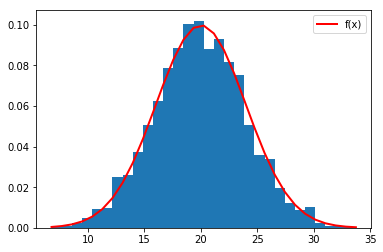

In [6]:
dist1 = gaussianDist("dist1", 20, 4, 3000)
dist1.plot()

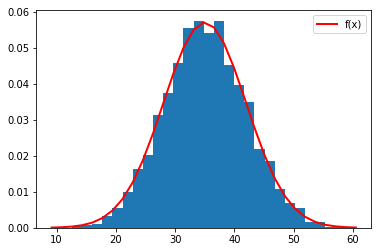

In [7]:
dist2 = gaussianDist("dist2", 35, 7, 5000)
dist2.plot()

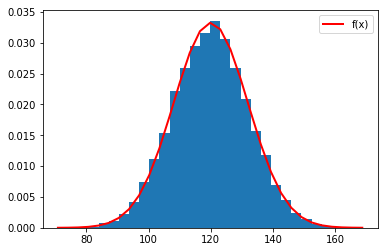

In [8]:
dist3 = gaussianDist("dist3", 120, 12, 10000)
dist3.plot()

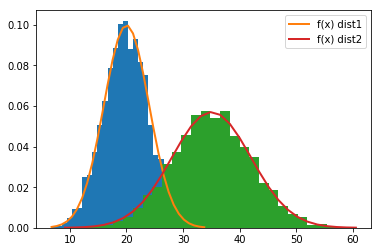

In [9]:
plotDistsTogether(dist1, dist2)

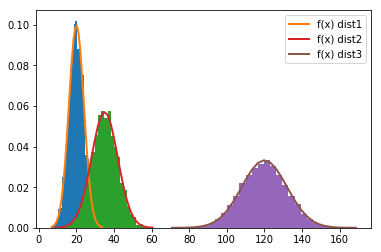

In [10]:
plotDistsTogether(dist1, dist2, dist3)

In [11]:
densityDistsTogether(120, dist1, dist2, dist3)

f(120 in dist1) =  1.9134824341048483e-137
f(120 in dist2) =  5.466041520513093e-34
f(120 in dist3) =  0.03324519003345273
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(120) =  0.01846955001858485


In [12]:
densityDistsTogether(25, dist1, dist2)

f(25 in dist1) =  0.04566227134725548
f(25 in dist2) =  0.020542551821266894
Thetas = [3000, 5000]
Thetas Sum = 8000
Total f(25) =  0.029962446643512615


In [13]:
densityDistsTogether(25, dist1, dist2, dist3)

f(25 in dist1) =  0.04566227134725548
f(25 in dist2) =  0.020542551821266894
f(25 in dist3) =  8.171976075697016e-16
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(25) =  0.013316642952672725


In [14]:
densityDistsTogether(70, dist1, dist2, dist3)

f(70 in dist1) =  1.1737988394937866e-35
f(70 in dist2) =  2.1238850210489971e-07
f(70 in dist3) =  5.646917490734814e-06
Thetas = [3000, 5000, 10000]
Thetas Sum = 18000
Total f(70) =  3.196173189881813e-06


## Superclass Discovery

In [15]:
class SuperClass:
    def __init__(self):
        self.mu = 0
        self.sigma = 0
        self.alpha = 0
        self.beta = 0
        self.size = 0
        self.subclasses = []
        self.n_subclasses = 0
        self.points = []

    def insert_subclass(self, dist):
        self.points.extend(dist.points)
        self.mu = np.mean(self.points)
        self.sigma = np.std(self.points)
        self.n_subclasses += 1
        self.subclasses.append(dist.name)
        self.size += dist.size

    def describe(self):
        print("Superclass Description:")
        print("Size = %d" % self.size)
        print("Known subclasses:", self.subclasses)
        print("Number of known subclasses = %d" % self.n_subclasses)
        print("Mu = %.4f" % self.mu)
        print("Sigma = %.4f" % self.sigma)
        print("Alpha = %.4f" % self.alpha)
        print("Beta = %.4f" % self.beta)

In [16]:
sc = SuperClass()
sc.insert_subclass(dist1)
sc.describe()

Superclass Description:
Size = 3000
Known subclasses: ['dist1']
Number of known subclasses = 1
Mu = 19.9223
Sigma = 4.0218
Alpha = 0.0000
Beta = 0.0000


In [17]:
sc.insert_subclass(dist3)
sc.describe()

Superclass Description:
Size = 13000
Known subclasses: ['dist1', 'dist3']
Number of known subclasses = 2
Mu = 96.7904
Sigma = 43.4591
Alpha = 0.0000
Beta = 0.0000
